sex
1    207
0     96
Name: count, dtype: int64


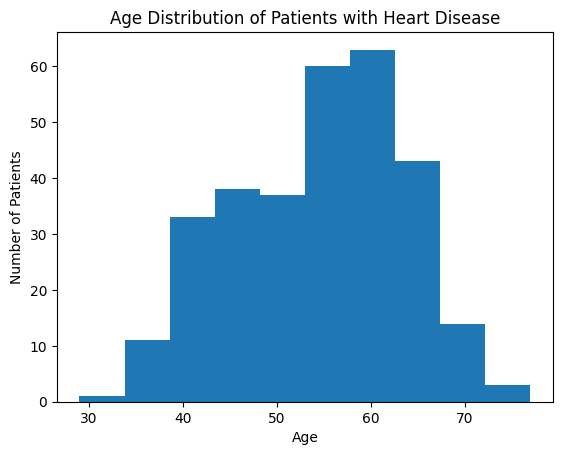

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
Accuracy: 0.8852459016393442
[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



c:\users\richa\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
# ============================================================
# Heart Disease Prediction using Logistic Regression
# ============================================================

# -------------------------------
# 1. Import Required Libraries
# -------------------------------
import pandas as pd          # for data handling and analysis
import numpy as np           # for numerical operations
import matplotlib.pyplot as plt   # for data visualization

from sklearn.model_selection import train_test_split  # to split data into train & test
from sklearn.linear_model import LogisticRegression   # Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# evaluation metrics

# -------------------------------
# 2. Load Dataset
# -------------------------------
df = pd.read_csv(
    "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv"
)  # load dataset from online source

df.shape        # shows number of rows and columns
df.columns      # shows all column names

# -------------------------------
# 3. Basic Data Exploration
# -------------------------------
df.isnull().sum()        # check missing values in each column
df['target'].value_counts()  # count patients with and without heart disease

df['age'].mean()     # average age of patients
df['chol'].max()     # maximum cholesterol value
df['chol'].min()     # minimum cholesterol value

print(df['sex'].value_counts())  
# count number of males and females in dataset

# -------------------------------
# 4. Data Visualization
# -------------------------------
plt.figure()
plt.hist(df["age"], bins=10)   # histogram showing age distribution
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Age Distribution of Patients with Heart Disease")
plt.show()

# -------------------------------
# 5. Define Features and Target
# -------------------------------
X = df.drop(columns=['target'])  
# input features (all columns except target)

y = df['target']  
# target variable (0 = no disease, 1 = heart disease)

# -------------------------------
# 6. Split Data into Training & Testing
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% data for testing
    random_state=42     # ensures same split every time
)

# -------------------------------
# 7. Train Logistic Regression Model
# -------------------------------
model = LogisticRegression()  # create model
model.fit(X_train, y_train)   # train model using training data

# -------------------------------
# 8. Make Predictions
# -------------------------------
y_pred = model.predict(X_test)  # predict results on test data
print(y_pred)

# -------------------------------
# 9. Model Evaluation
# -------------------------------

# Accuracy → overall correctness of model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix → shows correct & incorrect predictions
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report → precision, recall, f1-score
report = classification_report(y_test, y_pred)
print(report)